In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import cv2


2025-06-03 15:31:16.714714: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 15:31:16.719038: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 15:31:16.730434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748935876.749499   10766 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748935876.754816   10766 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-03 15:31:16.774640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

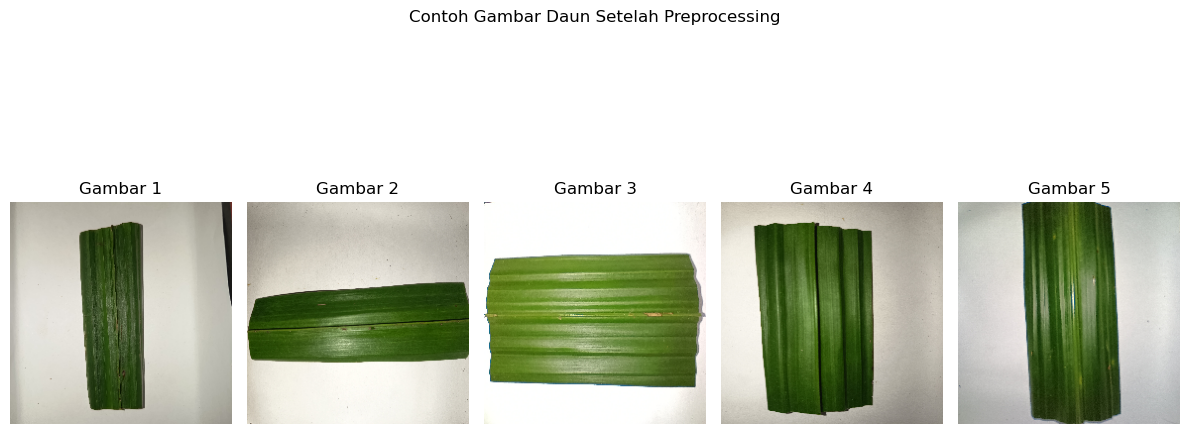

In [2]:
IMAGE_SIZE = (224, 224)
DATA_DIR = "/home/amamiya/Desktop/Final-Project-Component/Data/Daun_Sehat"

# Ambil contoh 5 gambar dari folder
all_filenames = os.listdir(DATA_DIR)

# Tentukan jumlah sampel yang ingin diambil secara acak
num_samples = 5

# Pilih secara acak tanpa pengulangan
sample_images = random.sample(all_filenames, num_samples)

# Buat path lengkap
sample_images = [os.path.join(DATA_DIR, fname) for fname in sample_images]

# Fungsi untuk preprocessing satu gambar
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMAGE_SIZE, color_mode="rgb")
    img_array = img_to_array(img) / 255.0  # Normalisasi ke [0, 1]
    return img_array

# Proses semua contoh
processed_images = [preprocess_image(path) for path in sample_images]

# Konversi ke NumPy array
processed_images = np.array(processed_images)

# Plot hasil preprocessing
plt.figure(figsize=(12, 6))
for i in range(len(processed_images)):
    plt.subplot(1, len(processed_images), i+1)
    plt.imshow(processed_images[i])
    plt.title(f"Gambar {i+1}")
    plt.axis('off')

plt.suptitle("Contoh Gambar Daun Setelah Preprocessing")
plt.tight_layout()
plt.show()

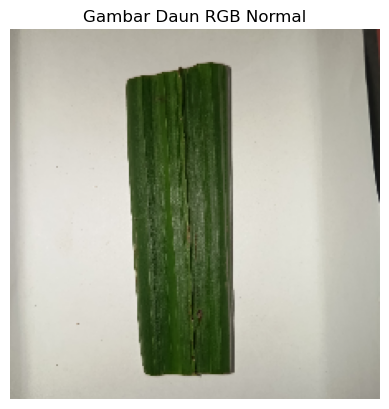

In [4]:

img = cv2.imread("/home/amamiya/Desktop/Final-Project-Component/Data/Daun_Sehat/IMG_20250520_131849.jpg")
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_normalized = img_rgb / 255.0

plt.imshow(img_normalized)
plt.title("Gambar Daun RGB Normal")
plt.axis('off')
plt.show()

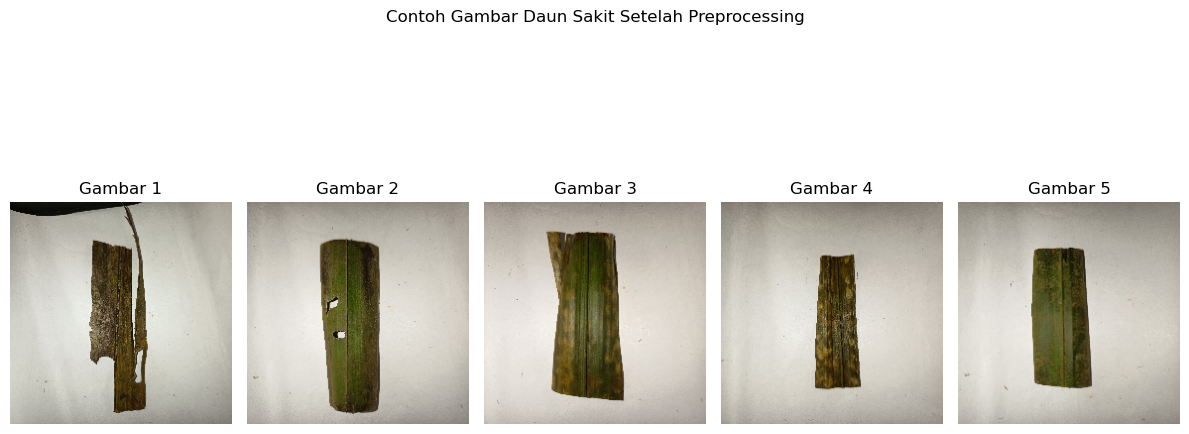

In [5]:
IMAGE_SIZE = (224, 224)
DATA_DIR = "/home/amamiya/Desktop/Final-Project-Component/Data/Penyakit_Daun_1"

# Ambil contoh 5 gambar dari folder
sample_images = [os.path.join(DATA_DIR, fname) for fname in os.listdir(DATA_DIR)[:5]]

# Fungsi untuk preprocessing satu gambar
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMAGE_SIZE, color_mode="rgb")
    img_array = img_to_array(img) / 255.0  # Normalisasi ke [0, 1]
    return img_array

# Proses semua contoh
processed_images = [preprocess_image(path) for path in sample_images]

# Konversi ke NumPy array
processed_images = np.array(processed_images)

# Plot hasil preprocessing
plt.figure(figsize=(12, 6))
for i in range(len(processed_images)):
    plt.subplot(1, len(processed_images), i+1)
    plt.imshow(processed_images[i])
    plt.title(f"Gambar {i+1}")
    plt.axis('off')

plt.suptitle("Contoh Gambar Daun Sakit Setelah Preprocessing")
plt.tight_layout()
plt.show()


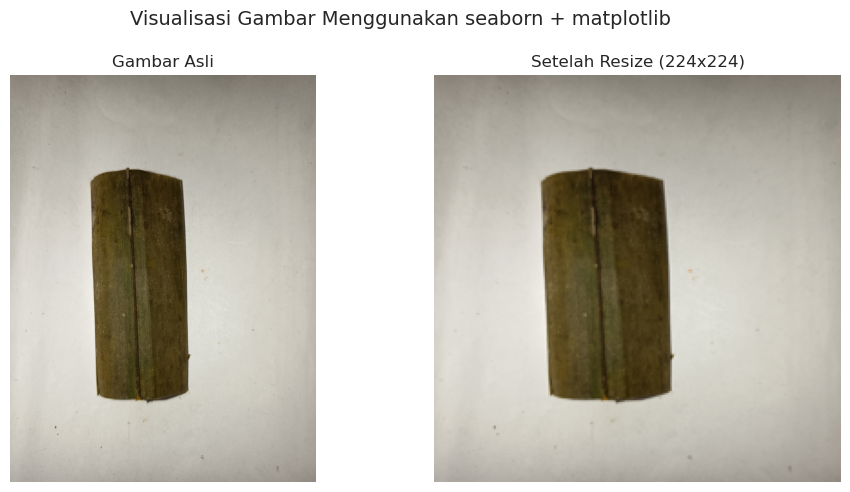

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Atur tema seaborn
sns.set_theme(style="white")

# Path gambar
DATA_DIR = "/home/amamiya/Desktop/Final-Project-Component/Data/Penyakit_Daun_1/IMG_20250520_213903.jpg"

# Buka gambar dan konversi ke RGB untuk mencegah masalah warna
img = Image.open(DATA_DIR).convert('RGB')

# Resize ke 224x224
img_resized = img.resize((224, 224))

# Simpan hasil resize (opsional)
img_resized.save("resized_image.jpg")

# Konversi ke array numpy agar ditampilkan dengan warna benar
img_np = np.array(img)
img_resized_np = np.array(img_resized)

# Plot menggunakan matplotlib dengan tema seaborn
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Setelah Resize (224x224)")
plt.imshow(img_resized_np)
plt.axis("off")

plt.suptitle("Visualisasi Gambar Menggunakan seaborn + matplotlib", fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
# Blok dasar ResNet18 (BasicBlock)
def conv_block(x, filters, kernel_size=3, stride=1, downsample=False):
    shortcut = x

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if downsample:
        shortcut = layers.Conv2D(filters, 1, strides=stride, use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

In [8]:
def build_resnet18(input_shape=(224, 224, 3), num_classes=5):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Layer-layer ResNet18 sesuai arsitektur
    x = conv_block(x, 64)
    x = conv_block(x, 64)

    x = conv_block(x, 128, stride=2, downsample=True)
    x = conv_block(x, 128)

    x = conv_block(x, 256, stride=2, downsample=True)
    x = conv_block(x, 256)

    x = conv_block(x, 512, stride=2, downsample=True)
    x = conv_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [9]:
model = build_resnet18(input_shape=(224, 224, 3), num_classes=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-06-03 15:31:22.846329: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,408 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,864 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,864 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,864 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,864 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]  

 Total params: 11,188,677 (42.68 MB)

 Trainable params: 11,179,077 (42.64 MB)

 Non-trainable params: 9,600 (37.50 KB)